In [16]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the election results page
base_url = "https://results.eci.gov.in"
main_url = f"{base_url}/PcResultGenJune2024/index.htm"

# Send a request to fetch the HTML content of the main page
response = requests.get(main_url)
response.raise_for_status()
soup = BeautifulSoup(response.content, "html.parser")

# Find the links to detailed result pages
links = soup.find_all("a", href=True)
detailed_links = [f"{base_url}/{link['href']}" for link in links if "PartyWiseResult" in link['href']]

# Extract data from each detailed result page
results = []
for url in detailed_links:
    response = requests.get(url)
    response.raise_for_status()
    page_soup = BeautifulSoup(response.content, "html.parser")
    # Extract relevant data from the page (example: constituency results)
    # This part depends on the specific HTML structure of the detailed result pages
    table = page_soup.find("table", {"id": "div1"})
    if table:
        rows = table.find_all("tr")
        for row in rows:
            cells = row.find_all("td")
            if len(cells) > 1:
                result = [cell.text.strip() for cell in cells]
                results.append(result)

# Create a DataFrame from the results
columns = ["Constituency", "Candidate", "Party", "Votes", "Percentage", "Margin"]
df = pd.DataFrame(results, columns=columns)

# Save the DataFrame to a CSV file
df.to_csv("election_results.csv", index=False)
print("Data has been saved to election_results.csv")


Data has been saved to election_results.csv


Top 10 constituencies by vote margin:
          Constituency                     Candidate  \
323             Tawang                NAMGEY TSERING   
201         Brahmagiri              UPASNA MOHAPATRA   
98    Nandikotkur (SC)                   G JAYASURYA   
37            Giddalur  KUNDURU NAGARJUNA REDDY (KP)   
356  GYALSHING-BARNYAK               LOK NATH SHARMA   
152          Udayagiri                KAKARLA SURESH   
234            Khariar       ADHIRAJ MOHAN PANIGRAHI   
286            Sukinda           PRADEEP BAL SAMANTA   
33            Gajuwaka        AVSS AMARNATH GUDIVADA   
224             Telkoi          DR. FAKIR MOHAN NAIK   

                        Party  Votes Assembly Constituencies Margin  
323   National People's Party      5       Arunachal pradesh    996  
201    Bharatiya Janata Party     78                  odisha   9830  
98               Telugu Desam    135          Andhra pradesh   9792  
37               Telugu Desam    135          Andhra pradesh    9

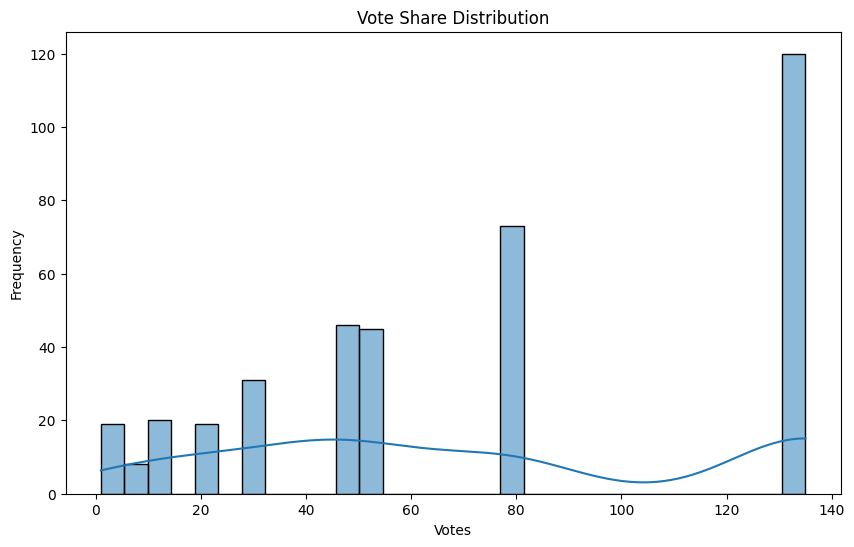

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("election_results.csv")

top_margin = df.sort_values(by="Margin", ascending=False).head(10)
print("Top 10 constituencies by vote margin:")
print(top_margin)

plt.figure(figsize=(10, 6))
sns.histplot(df['Votes'], bins=30, kde=True)
plt.title("Vote Share Distribution")
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.show()

# Save analysis and visualizations in a report
with open("election_analysis_report.md", "w") as f:
    f.write("# Election Analysis Report\n")
    f.write("## Top 10 Constituencies by Vote Margin\n")
    f.write(top_margin.to_markdown())
    f.write("\n\n")
    f.write("## Vote Share Distribution\n")
    f.write("![Vote Share Distribution](vote_share_distribution.png)\n")
